__Dictionary-based sentiment analysis with Python__
<br>



Download the following CSV file from Kaggle:
<br>


https://www.kaggle.com/therohk/million-headlines



This is a dataset of over a million headlines taken from the Australian news source ABC (Start Date: 2003-02-19 ; End Date: 2020-12-31).



- Calculate the sentiment score for every headline in the data. You can do this using the spaCyTextBlob approach that we covered in class or any other dictionary-based approach in Python.
- Create and save a plot of sentiment over time with a 1-week rolling average
- Create and save a plot of sentiment over time with a 1-month rolling average
- Make sure that you have clear values on the x-axis and that you include the following: a plot title; labels for the x and y axes; and a legend for the plot
- Write a short summary (no more than a paragraph) describing what the two plots show. You should mention the following points: 1) What (if any) are the general trends? 2) What (if any) inferences might you draw from them?

## Importing file and packages

In [ ]:
import os
import sys
sys.path.append(os.path.join(".."))
from pathlib import Path #Importing Path that we are going to acces our files with.
import pandas as pd
import matplotlib.pyplot as plt
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
#Initialise spacy
nlp = spacy.load("en_core_web_sm") #nlp = natural language processing.
import numpy as np

In [3]:
#Adding spaCyTextBlob to spaCy piplone:
spacy_text_blob = SpacyTextBlob()
nlp.add_pipe(spacy_text_blob)

In [2]:
'''
Reading file from path and saving data in data.
The lines are commented out beacause i made a dataframe containing scores further down in the code, so i don't have to calculate
the scores sentiment scores again.
The dataframe is saved in a csv-file called Headlines.csv

'''
#in_file = os.path.join("..", "..", "data", "abcnews-date-text.csv")
#data = pd.read_csv(in_file)

In [9]:
'''
DON'T RUN THIS CODE!!!
'''

# Creating a container for the sentiment scores:
output = []

#The loop runs through the headlines in the csv-file.
for doc in nlp.pipe(data["headline_text"],
                   disable=["tagger", "parser", "ner"]): #Disabeling to make the code run faster, since there is a lot of data and the processing time is long.
    output.append(doc._.sentiment.polarity) #appending the scores to our output container.

# Creating a new dataframe
data_df = pd.DataFrame(data)

# Appending a new series/column to the new df, with the scores
data_df["scores"] = output

CPU times: user 13min, sys: 3.28 s, total: 13min 4s
Wall time: 13min 4s


## Writing new data frame to csv file

In [2]:
'''
Writing new dataframe to csv-file.

'''

#data_df.to_csv('Headlines.csv') #Writing the newly created dataframe to a csv, so it does not have to be created again later.

In [4]:
'''
Loading the new file.
'''

new_file = os.path.join("Headlines.csv")

new_data = pd.read_csv(new_file)

type(new_data) # Looking at the DF.

pandas.core.frame.DataFrame

In [5]:
# new_data now also consist of a column/series of scores (sentiment scores)
new_data

#Deleting the series named "Unnamed: 0"
del new_data["Unnamed: 0"]

In [6]:
len(new_data) #checking the new df.

1226258

In [7]:
#Calculation the avarage score for for each date using groupby() and mean()
avg_data = new_data.groupby("publish_date").mean()

#The dataframe no longer contains the headlines, and only 1 date for each day.
#The avarage score for the sentiment is calculated and saved. The df is now considarably smaler.
len(avg_data)
avg_data

,scores
publish_date,
20030219,0.005259
20030220,0.016552
20030221,0.004962
20030222,0.030703
20030223,0.001185
...,...
20201227,-0.007455
20201228,0.023704
20201229,0.009022


## Creating the plot

In [8]:
# The plot only work correctly if i put it into a "normal" list

#Creating container for our avarage scores
mean_scores = []


for i in avg_data["scores"]:
    # appending avg_scores to list.
    mean_scores.append(i)

In [31]:
#Smoothing out the mean_scores
smoothed_sentiment_weeks = pd.Series(mean_scores).rolling(7).mean()
smoothed_sentiment_months = pd.Series(mean_scores).rolling(30).mean()
'''
I am not sure why i get the right plot by using a list compaered to avg_data["scores"] in the smoothing of the sentiment.
But running this code: "smoothed_sentiment_weeks = pd.Series(avg_data["scores"]).rolling(7).mean()" gives a very different plot.
'''


([<matplotlib.axis.XTick at 0x7f6d6b6e5978>,
 [Text(0.0, 0, '2003'),
  Text(365.25, 0, '2004'),
  Text(730.5, 0, '2005'),
  Text(1095.75, 0, '2006'),
  Text(1461.0, 0, '2007'),
  Text(1826.25, 0, '2008'),
  Text(2191.5, 0, '2009'),
  Text(2556.75, 0, '2010'),
  Text(2922.0, 0, '2011'),
  Text(3287.25, 0, '2012'),
  Text(3652.5, 0, '2013'),
  Text(4017.75, 0, '2014'),
  Text(4383.0, 0, '2015'),
  Text(4748.25, 0, '2016'),
  Text(5113.5, 0, '2017'),
  Text(5478.75, 0, '2018'),
  Text(5844.0, 0, '2019'),
  Text(6209.25, 0, '2020')])

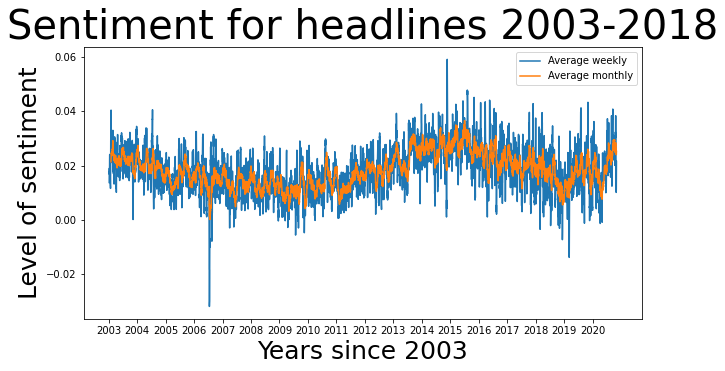

In [52]:
#plotting the size of the figure.
fig = plt.figure(figsize = (10,5)) 

#Creating a title for the plot.
plt.title("Sentiment for headlines 2003-2020", fontsize = 40)

#naming x and y labels
plt.xlabel("Years since 2003", fontsize = 25)
plt.ylabel("Level of sentiment", fontsize = 25)

#plotting:
plt.plot(smoothed_sentiment_weeks)
plt.plot(smoothed_sentiment_months)
#plt.plot(smoothed_sentiment_years)


#Adding a legend in right corner.
plt.legend(["Average weekly", "Average monthly"],
               loc='upper right',
               fontsize= 10)

#changing the numbers of the x-asis.
plt.xticks(np.arange(0, len(mean_scores)+1,365.25), range(2003,2021))

__Write a short summary (no more than a paragraph) describing what the two plots show. <br>
You should mention the following points:__
1) What (if any) are the general trends? <br>
2) What (if any) inferences might you draw from them?
<br>
<br>
The two plots show, the sentiment score of the headlines calculated by spacy's text blob, as an avarage of each rolling week (the blue) and each rolling month (the orange). From the plot it can be read what the avarage sentiment of the headlines were in in on a weekly basis from 2003 to 2020. a lov score suggests a negative sentiment while a high sugests a positive sentiment. 